In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_excel(r"C:\Users\hp\Documents\data science resources\iris.xlsx")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.shape

(150, 5)

### Missing Value Handling

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [8]:
sel_cols=data[['SL', 'SW', 'PL']]

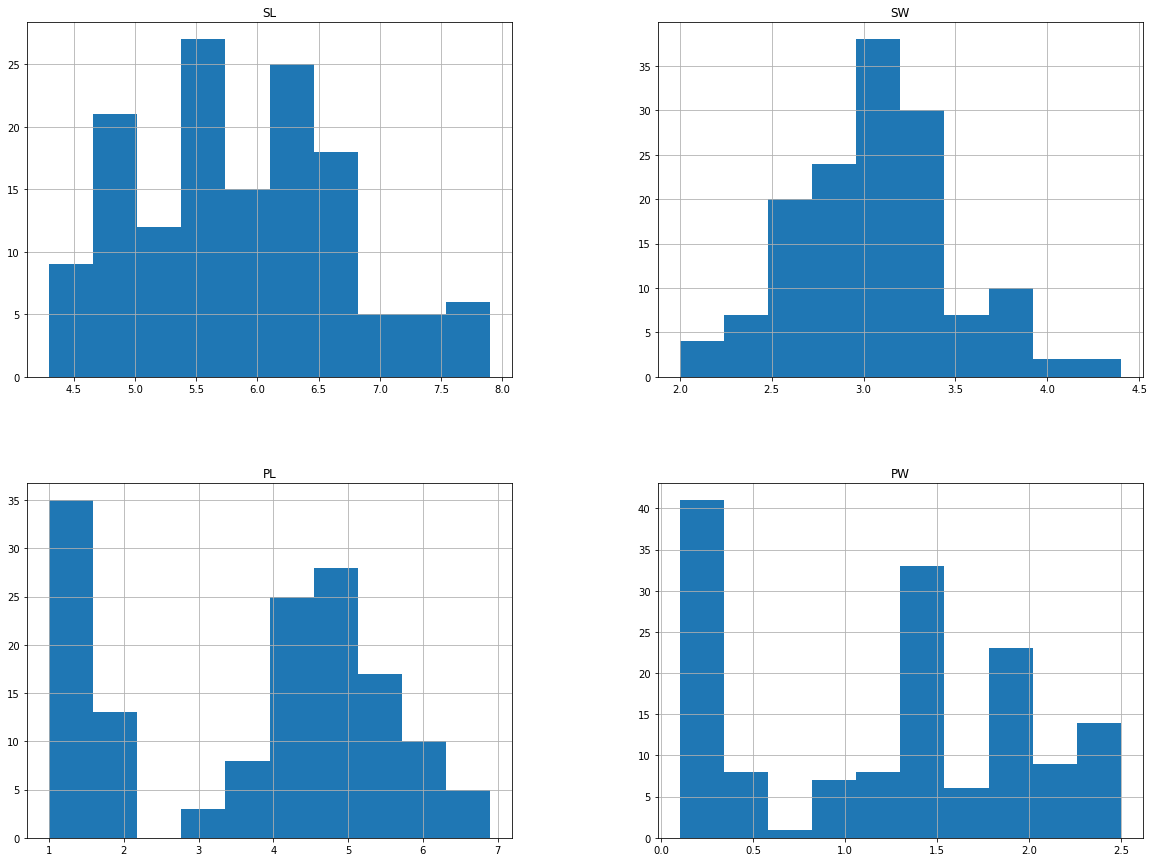

In [9]:
freq_graph = data.select_dtypes(include='float')
freq_graph.hist(figsize=[20,15])
plt.show()

In [10]:
for i in ['SL', 'SW', 'PL']:
    data[i]=data[i].fillna(data[i].mean())

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


### Outlier Detection

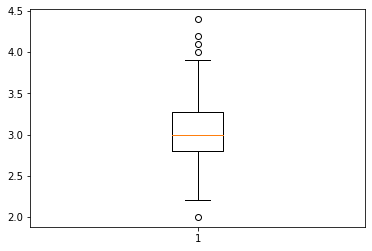

In [13]:
plt.boxplot(data['SW']) #Others doesn't have Outliers
plt.show()

In [14]:
Q1 = np.percentile(data['SW'], 25)
Q2 = np.percentile(data['SW'], 50)
Q3 = np.percentile(data['SW'], 75)
IQR=Q3-Q1
print(Q1, Q2, Q3, IQR)

2.8 3.0 3.275 0.4750000000000001


In [15]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit, upper_limit)

2.0874999999999995 3.9875


In [16]:
outlier = []
for x in data['SW']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)

In [17]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [18]:
ind = data['SW']>upper_limit
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [19]:
data.drop([14, 15, 32, 33], inplace = True)
data.shape

(146, 5)

### Classification

In [20]:
data['Classification'].nunique()

3

In [21]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
data['Classification'].value_counts(normalize=True)

Iris-versicolor    0.342466
Iris-virginica     0.342466
Iris-setosa        0.315068
Name: Classification, dtype: float64

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

In [24]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [25]:
data.shape

(146, 5)

In [26]:
x=data.drop(['Classification'], axis=1)
y=data['Classification']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### k-NN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
metric_k= []
neighbors = np.arange(3,15)

In [31]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train, y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_predictions)
    metric_k.append(acc)

In [32]:
metric_k

[0.9459459459459459,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.9459459459459459,
 0.9459459459459459,
 0.918918918918919,
 0.9459459459459459,
 0.9459459459459459,
 0.972972972972973,
 0.9459459459459459]

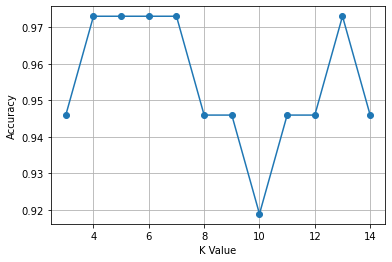

In [33]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid()

In [34]:
classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
classifier.fit(x_train, y_train)
y_predictions = classifier.predict(x_test)

In [35]:
print("Accuracy is: ", accuracy_score(y_test, y_predictions))
print("Precision is: ", precision_score(y_test, y_predictions, average = 'micro'))
print("Recall is: ", recall_score(y_test, y_predictions, average = 'micro'))
print("F1 Score is: ", f1_score(y_test, y_predictions, average = 'micro'))
print("Confusion_matrix is: ", confusion_matrix(y_test, y_predictions))

Accuracy is:  0.9459459459459459
Precision is:  0.9459459459459459
Recall is:  0.9459459459459459
F1 Score is:  0.9459459459459459
Confusion_matrix is:  [[15  1  0]
 [ 0  8  0]
 [ 0  1 12]]


### Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [38]:
y_predi = nb_classifier.predict(x_test)

In [39]:
print("Accuracy is: ", accuracy_score(y_test, y_predi))
print("Precision is: ", precision_score(y_test, y_predi, average = 'micro'))
print("Recall is: ", recall_score(y_test, y_predi, average = 'micro'))
print("F1 Score is: ", f1_score(y_test, y_predi, average = 'micro'))
print("Confusion_matrix is: ", confusion_matrix(y_test, y_predi))

Accuracy is:  0.9459459459459459
Precision is:  0.9459459459459459
Recall is:  0.9459459459459459
F1 Score is:  0.9459459459459459
Confusion_matrix is:  [[16  0  0]
 [ 0  7  1]
 [ 0  1 12]]


### SVM Linear

In [40]:
from sklearn.svm import SVC

In [41]:
svm_cls = SVC(kernel = 'linear')
svm_cls = svm_cls.fit(x_train, y_train) 

In [42]:
pred_svm = svm_cls.predict(x_test)

In [43]:
print("Accuracy is: ", accuracy_score(y_test, pred_svm))
print("Precision is: ", precision_score(y_test, pred_svm, average = 'micro'))
print("Recall is: ", recall_score(y_test, pred_svm, average = 'micro'))
print("F1 Score is: ", f1_score(y_test, pred_svm, average = 'micro'))
print("Confusion_matrix is: ", confusion_matrix(y_test, pred_svm))

Accuracy is:  0.972972972972973
Precision is:  0.972972972972973
Recall is:  0.972972972972973
F1 Score is:  0.972972972972973
Confusion_matrix is:  [[16  0  0]
 [ 0  7  1]
 [ 0  0 13]]


### SVM Non-Linear

In [44]:
svm_cls = SVC(kernel = 'rbf')
svm_cls = svm_cls.fit(x_train, y_train)

In [45]:
pred_svm1 = svm_cls.predict(x_test)

In [46]:
print("Accuracy is: ", accuracy_score(y_test, pred_svm1))
print("Precision is: ", precision_score(y_test, pred_svm1, average = 'micro'))
print("Recall is: ", recall_score(y_test, pred_svm1, average = 'micro'))
print("F1 Score is: ", f1_score(y_test, pred_svm1, average = 'micro'))
print("Confusion_matrix is: ", confusion_matrix(y_test, pred_svm1))

Accuracy is:  0.918918918918919
Precision is:  0.918918918918919
Recall is:  0.918918918918919
F1 Score is:  0.918918918918919
Confusion_matrix is:  [[15  1  0]
 [ 0  8  0]
 [ 0  2 11]]


### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train, y_train)

In [49]:
pred_dt = dt_cls.predict(x_test)

In [50]:
print("Accuracy is: ", accuracy_score(y_test, pred_dt))
print("Precision is: ", precision_score(y_test, pred_dt, average = 'micro'))
print("Recall is: ", recall_score(y_test, pred_dt, average = 'micro'))
print("F1 Score is: ", f1_score(y_test, pred_dt, average = 'micro'))
print("Confusion_matrix is: ", confusion_matrix(y_test, pred_dt))

Accuracy is:  0.9459459459459459
Precision is:  0.9459459459459459
Recall is:  0.9459459459459459
F1 Score is:  0.9459459459459459
Confusion_matrix is:  [[16  0  0]
 [ 0  7  1]
 [ 0  1 12]]


### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train, y_train)

In [53]:
pred_rf = rf_cls.predict(x_test)

In [54]:
print("Accuracy is: ", accuracy_score(y_test, pred_rf))
print("Precision is: ", precision_score(y_test, pred_rf, average = 'micro'))
print("Recall is: ", recall_score(y_test, pred_rf, average = 'micro'))
print("F1 Score is: ", f1_score(y_test, pred_rf, average = 'micro'))
print("Confusion_matrix is: ", confusion_matrix(y_test, pred_rf))

Accuracy is:  0.9459459459459459
Precision is:  0.9459459459459459
Recall is:  0.9459459459459459
F1 Score is:  0.9459459459459459
Confusion_matrix is:  [[16  0  0]
 [ 0  7  1]
 [ 0  1 12]]


### SVM Linear classification has more accuracy and precision value with 0.973 value, followed by k-NN, Naive Bayes, Decision tree and Random Forest with Accuracy and Precision values 0.945